In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Exercise 1

In [105]:

def get_risk(alpha, M = 10000):
    X = np.random.uniform(-2, 2, size=M)
    epsilon = np.random.uniform(-1, 1, size=M)
    Y = 2 * X + epsilon
    
    loss = np.mean((Y - alpha * X) ** 2)
    
    return loss 


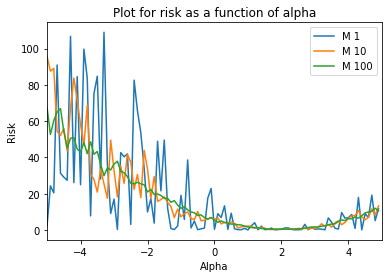

In [106]:

def lowest_risk(value, counts, step = 0.1):
    vals = np.arange(-value, value, step)
    
    
    for M in counts:
        risks = [get_risk(x, M) for x in vals]
        plt.plot(vals, risks, label='M ' + str(M))
        
        
    plt.ylabel('Risk')
    plt.xlabel('Alpha')
    plt.legend()
    plt.xlim((-5, 5))
    plt.title('Plot for risk as a function of alpha')
    plt.show()
        
    
lowest_risk(5, [1, 10, 100])

The lowest risk is reached at alpha = 2

In [114]:
# Risk at 2.5
get_risk(2.5)

0.6508466378478981

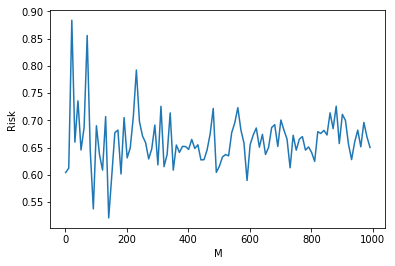

In [19]:
def plot_approximation():
    vals = np.arange(1, 1000, 10)
    
    risks = np.array([])
    
    for M in vals:
        risks = np.append(risks, get_risk(2.5, M))
        
    plt.plot(vals, risks)
    plt.ylabel('Risk')
    plt.xlabel('M')
    plt.show()
    
plot_approximation()

This plot suggests that the risk settles at about 0.65 after a M is about 100. According to the previous plot the value of M seems pretty stable.

# Exercise 3

In [31]:
data = pd.read_csv('wine.csv', delimiter=';')

Y = data['alcohol'].as_matrix()
data = data.drop('alcohol', axis=1)
data['bias'] = 1
X = data.as_matrix()


for i in range(X.shape[1] - 1):
    mini = np.amin(X[:,i])
    maxi = np.amax(X[:,i])
    X[:,i] = (X[:,i] - mini) / (maxi - mini)
    


X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [101]:


def loss(x, y, theta):
    return (np.square(np.matmul(x, theta) - y))

def gradient(x, y, theta):
    return 2 * ((np.matmul(x, theta) - y) @ x)


def stochastic_gradient_descent(X, Y, theta, step, rate, batch=10, ada=False):
    losshist = np.array([])
    gradhist = np.array([])
    valhist = np.array([])
    i = 1
    gradsum = np.zeros(12)
    
    while(i < 5000):
        valhist = np.append(valhist, loss(X_test, y_test, theta).mean())
        randoms = np.random.choice(range(len(Y)), batch)
        x = X[randoms]
        y = Y[randoms]
        
        
        l = loss(x, y, theta)
        g = gradient(x, y, theta)
        
        gradsum = np.append(gradsum, g)
        
        if ada:
            upd = step / (rate + np.sqrt(np.sum(np.square(gradsum))))
        else:
            upd = step / (1 + step * rate * i)
            
        theta = theta - upd * (g)
        
        losshist = np.append(losshist, l.mean())
        
        i = i + 1
        
        
    return (losshist, gradhist, valhist, theta)
    
    

    

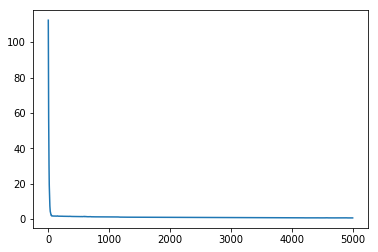

In [102]:
l, g, v, t = stochastic_gradient_descent(X_train, y_train, np.zeros(12), 0.005, 0.0001, 3)
l.shape

plt.plot(range(len(v)), v)

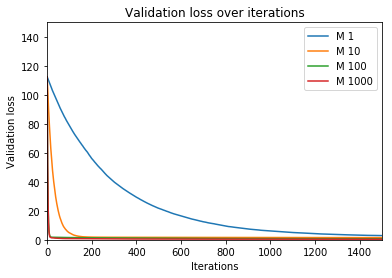

In [103]:
M = [1, 10, 100, 1000]

for i in M:
    l, g, v, t = stochastic_gradient_descent(X_train, y_train, np.zeros(12), 0.0005, 0.5, i)
    plt.xlabel('Iterations')
    plt.ylabel('Validation loss')
    plt.ylim(0, 150)
    plt.xlim(0, 1500)
    plt.plot(range(len(v)), v, label='M ' + str(i))
    plt.title('Validation loss over iterations')
    plt.legend()
    

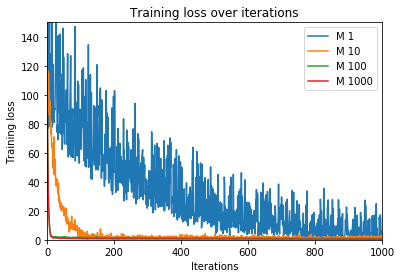

In [104]:
for i in M:
    l, g, v, theta = stochastic_gradient_descent(X_train, y_train, np.zeros(12), 0.0005, 0.5, i)
    plt.xlabel('Iterations')
    plt.ylabel('Training loss')
    plt.ylim(0, 150)
    plt.xlim(0, 1000)
    plt.title('Training loss over iterations')
    plt.plot(range(len(l)), l, label='M ' + str(i))
    plt.legend()

From these plots we can see that with higher M the losses decrease significantly faster. At M = 100 the rate seems to peak and there is no real difference in the rate between M = 100 and M = 1000. With small M there is obviously higher variance which can be seen in the plot as the roller coaster line on the plots, but the trend is still constantly down.

0.5271013765855169 Deterministic
0.5368624755932601 Adagrad


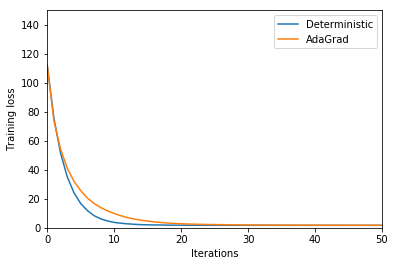

In [96]:
vals = [False, True]
for i in vals:
    if i:
        l, g, v, t = stochastic_gradient_descent(X_train, y_train, np.zeros(12), 1.5, 0.99, 100, i)
    else:
        l, g, v, t = stochastic_gradient_descent(X_train, y_train, np.zeros(12), 0.0005, 0.5, 100, i)

    plt.xlabel('Iterations')
    plt.ylabel('Validation loss')
    plt.ylim(0, 150)
    plt.xlim(0, 50)
    if i:  
        plt.plot(range(len(v)), v, label='AdaGrad')
        print(v[-1], 'Adagrad')
    else:
        plt.plot(range(len(v)), v, label='Deterministic')
        print(v[-1], 'Deterministic')
        
    plt.legend()

With these values both AdaGrad and the Deterministic updates seem to have quite equal eventual loss values and the decrease rate for the validation loss is slightly faster for the Deterministic function. 

0.1471569155048734 Deterministic
0.15899666445562638 Adagrad


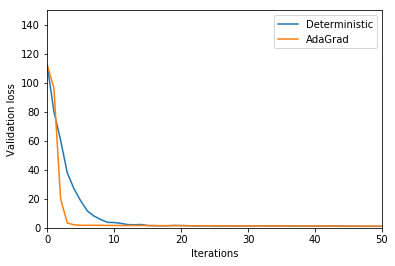

In [100]:
vals = [False, True]
for i in vals:
    if i:
        l, g, v, t = stochastic_gradient_descent(X_train, y_train, np.zeros(12), 15, 0.99, 100, i)
    else:
        l, g, v, t = stochastic_gradient_descent(X_train, y_train, np.zeros(12), 0.005, 0.00001, 100, i)

    plt.xlabel('Iterations')
    plt.ylabel('Validation loss')
    plt.ylim(0, 150)
    plt.xlim(0, 50)
    if i:  
        plt.plot(range(len(v)), v, label='AdaGrad')
        print(v[-1], 'Adagrad')
    else:
        plt.plot(range(len(v)), v, label='Deterministic')
        print(v[-1], 'Deterministic')
        
    plt.legend()

With these parameters the decrease of the loss is faster for AdaGrad and but it seems that the Deterministic function seems to constantly reach a slightly lower final loss. At about 10000 iterations the validation loss seems to reach constantly the same level as the linear regression from SKLearn, with which this plot is done with.

In [77]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
((reg.predict(X_test) - y_test)**2).mean()

0.14798823220928017